In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
df=pd.read_csv("/content/11-3-Dataset-Prediction of Heart Disease - 11-3-Dataset-Prediction of Heart Disease.csv")


In [54]:
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [55]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [56]:
df[["education","cigsPerDay","BPMeds","totChol","BMI","heartRate","glucose"]] = df[["education","cigsPerDay","BPMeds","totChol","BMI","heartRate","glucose"]].fillna(df[["education","cigsPerDay","BPMeds","totChol","BMI","heartRate","glucose"]].median())

In [57]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [58]:
 df=df.drop(["education"],axis=1)

In [59]:
 df.columns


Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [60]:
X = df.drop('TenYearCHD', axis=1)
Y = df['TenYearCHD']

In [61]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
group_names = ['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']
for i in group_names:
  X[i] = le.fit_transform(X[i])
Y = le.fit_transform(Y)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=156)

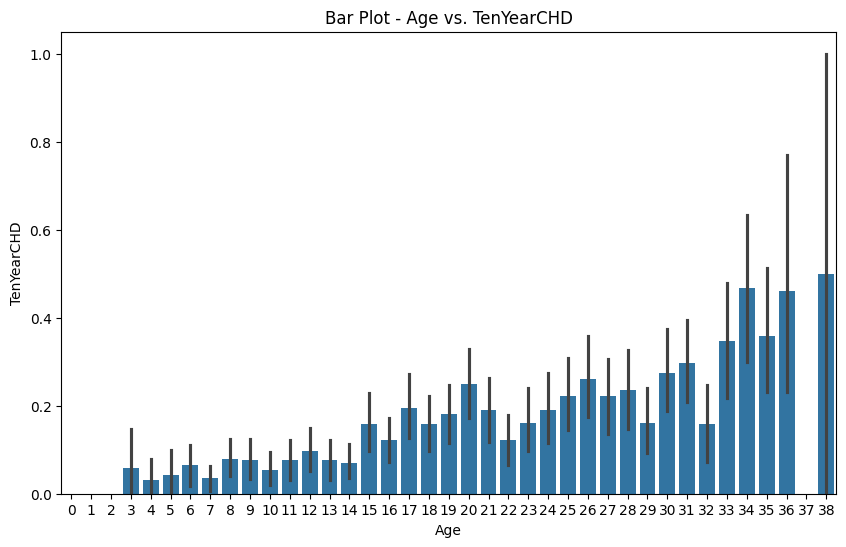

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x=X_train['age'].astype(int), y=Y_train)
plt.xlabel('Age')
plt.ylabel('TenYearCHD')
plt.title('Bar Plot - Age vs. TenYearCHD')
plt.show()

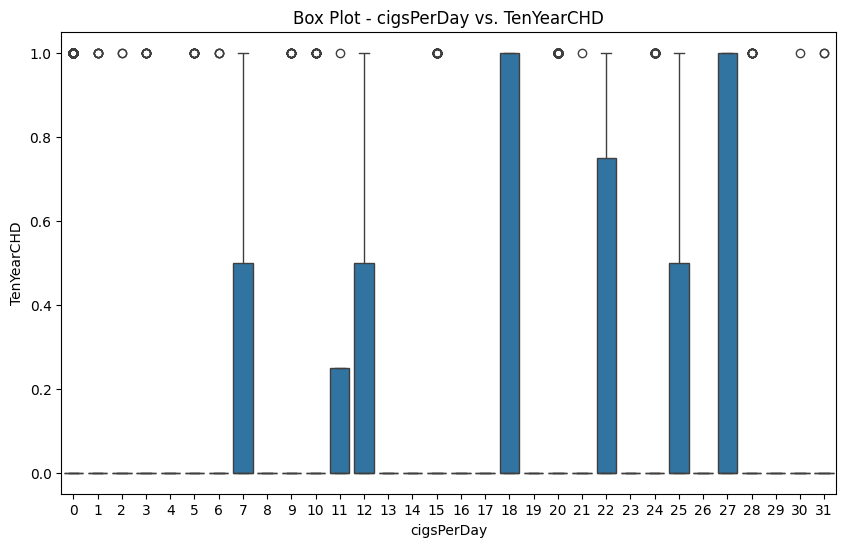

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['cigsPerDay'], y=Y_train)
plt.xlabel('cigsPerDay')
plt.ylabel('TenYearCHD')
plt.title('Box Plot - cigsPerDay vs. TenYearCHD')
plt.show()

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
sc=StandardScaler()

In [67]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Prediction Using Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
my_model = LogisticRegression()

In [70]:
result = my_model.fit(X_train, Y_train)

In [71]:
predictions = result.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [72]:
from sklearn.metrics import accuracy_score

In [73]:
print("Accuracy using LogisticRegression :",accuracy_score(Y_test, predictions))

Accuracy using LogisticRegression : 0.8431603773584906


In [74]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(Y_test, predictions)


In [75]:
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])


In [76]:
confusion_df


,Predicted neg,Predicted pos
Actual neg,702,3
Actual pos,130,13


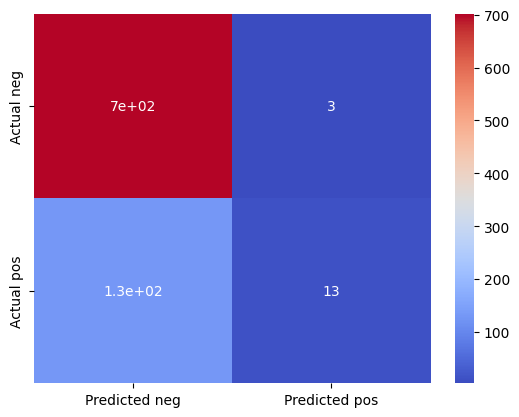

In [77]:
Color_conf_matrix = sns.heatmap(confusion_df, cmap='coolwarm',annot= True)


In [78]:
from sklearn import metrics
print('\n**Classification Report Using Logistic Regression:\n',metrics.classification_report(Y_test,predictions))


**Classification Report Using Logistic Regression:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       705
           1       0.81      0.09      0.16       143

    accuracy                           0.84       848
   macro avg       0.83      0.54      0.54       848
weighted avg       0.84      0.84      0.79       848



Prediction Using Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=0)
result=model.fit(X_train,Y_train)
predictions_df=result.predict(X_test)
predictions_df

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,

In [80]:
from sklearn.metrics  import accuracy_score
print("Accuracy Using Decision Tree:",accuracy_score(Y_test,predictions_df))


Accuracy Using Decision Tree: 0.7441037735849056


In [81]:
confusion_mat = confusion_matrix(Y_test, predictions_df)


In [82]:
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
confusion_df

,Predicted neg,Predicted pos
Actual neg,596,109
Actual pos,108,35


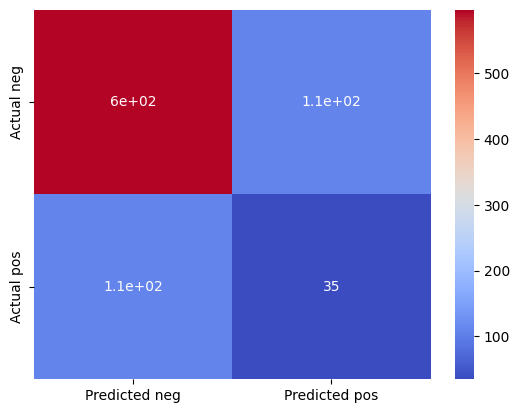

In [83]:
Color_conf_matrix = sns.heatmap(confusion_df, cmap='coolwarm',annot= True)

In [84]:
from sklearn import metrics
print('\n**Classification Report Using Decision Tree:\n',metrics.classification_report(Y_test,predictions_df))


**Classification Report Using Decision Tree:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       705
           1       0.24      0.24      0.24       143

    accuracy                           0.74       848
   macro avg       0.54      0.55      0.54       848
weighted avg       0.74      0.74      0.74       848



Prediction Using SVM

In [85]:
from sklearn.svm import SVC
my_model = SVC(kernel = 'rbf', random_state = 0)
result = my_model.fit(X_train, Y_train)
predictions_svm = result.predict(X_test)
predictions_svm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [86]:
from sklearn import metrics
print("Accuracy Using SVM:",metrics.accuracy_score(Y_test, predictions_svm))

Accuracy Using SVM: 0.8337264150943396


In [87]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
confusion_mat = confusion_matrix(Y_test, predictions_svm)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
confusion_df

,Predicted neg,Predicted pos
Actual neg,703,2
Actual pos,139,4


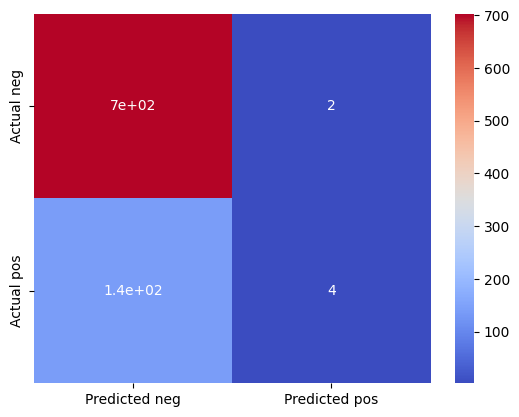

In [89]:
Color_conf_matrix = sns.heatmap(confusion_df, cmap='coolwarm',annot= True)


In [90]:
from sklearn import metrics
print('\n**Classification Report Using SVM:\n',metrics.classification_report(Y_test,predictions_svm))



**Classification Report Using SVM:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       705
           1       0.67      0.03      0.05       143

    accuracy                           0.83       848
   macro avg       0.75      0.51      0.48       848
weighted avg       0.81      0.83      0.76       848



Prediction Using KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier
my_model = KNeighborsClassifier(n_neighbors = 551)
result = my_model.fit(X_train,Y_train)
prediction_knn=result.predict(X_test)
prediction_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [92]:
from sklearn import metrics
print("Accuracy Using KNN:",metrics.accuracy_score(Y_test, prediction_knn))

Accuracy Using KNN: 0.8313679245283019


In [93]:
confusion_mat = confusion_matrix(Y_test, prediction_knn)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
confusion_df

,Predicted neg,Predicted pos
Actual neg,705,0
Actual pos,143,0


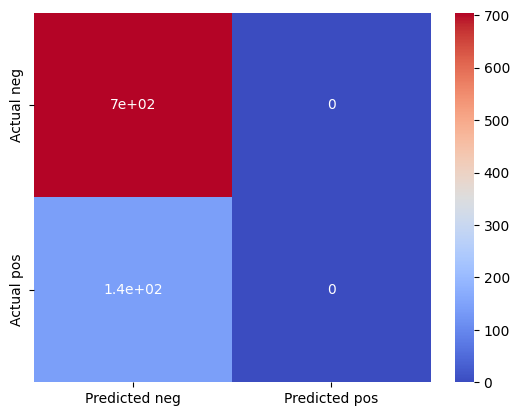

In [94]:
Color_conf_matrix = sns.heatmap(confusion_df, cmap='coolwarm',annot= True)

In [95]:
from sklearn import metrics
print('\n**Classification Report Using KNN:\n',metrics.classification_report(Y_test,prediction_knn))


**Classification Report Using KNN:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       705
           1       0.00      0.00      0.00       143

    accuracy                           0.83       848
   macro avg       0.42      0.50      0.45       848
weighted avg       0.69      0.83      0.75       848



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Prediction Using Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier
my_model = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 42)
result=my_model.fit(X_train,Y_train)

prediction_rf = result.predict(X_test)
prediction_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [97]:
from sklearn import metrics
print("Accuracy Random Forest :",metrics.accuracy_score(Y_test, prediction_rf))

Accuracy Random Forest : 0.8384433962264151


In [98]:
confusion_mat = confusion_matrix(Y_test, prediction_rf)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
confusion_df

,Predicted neg,Predicted pos
Actual neg,701,4
Actual pos,133,10


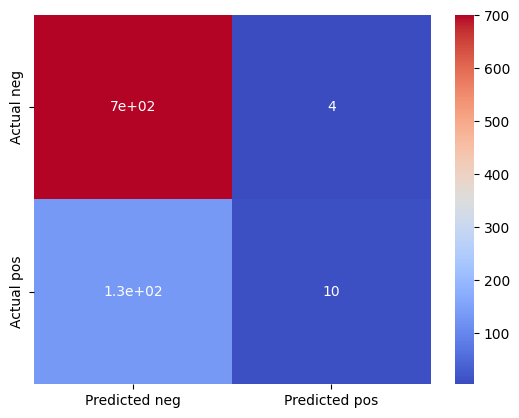

In [99]:
Color_conf_matrix = sns.heatmap(confusion_df, cmap='coolwarm',annot= True)

In [100]:
from sklearn import metrics
print('\n**Classification Report Using Random Forest:\n',metrics.classification_report(Y_test,prediction_rf))


**Classification Report Using Random Forest:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       705
           1       0.71      0.07      0.13       143

    accuracy                           0.84       848
   macro avg       0.78      0.53      0.52       848
weighted avg       0.82      0.84      0.78       848



In [101]:
"""
 Accuracy Random Forest : 0.8384433962264151
 Accuracy Using KNN: 0.8313679245283019
 Accuracy Using SVM: 0.8313679245283019
 Accuracy using LogisticRegression : 0.8290094339622641
 Accuracy Using Decision Tree: 0.7452830188679245

 Conclusion : Accuracy of Model Using Random Forest is greater in comparison with when we use other ML algorithm :)
 """

'\n Accuracy Random Forest : 0.8384433962264151\n Accuracy Using KNN: 0.8313679245283019\n Accuracy Using SVM: 0.8313679245283019\n Accuracy using LogisticRegression : 0.8290094339622641\n Accuracy Using Decision Tree: 0.7452830188679245\n\n Conclusion : Accuracy of Model Using Random Forest is greater in comparison with when we use other ML algorithm :)\n '